In [195]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt', 'indices']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Описание данных:

* userID: уникальный идентификатор пользователя
* browser: браузер, который использовал userID
* slot: в каком статусе пользователь участвовал в исследовании (exp = видел измененную страницу, control = видел неизменную страницу)
* n_clicks: количество кликов, которые пользоваль совершил за n_queries
* n_queries: количество запросов, который совершил userID, пользуясь браузером browser
* n_nonclk_queries: количество запросов пользователя, в которых им не было совершено ни одного клика

Обращаем ваше внимание, что не все люди используют только один браузер, поэтому в столбце userID есть повторяющиеся идентификаторы. В предлагаемых данных уникальным является сочетание userID и browser.

In [2]:
data=pd.read_csv('ab_browser_test.csv')
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


# Task 1

Основная метрика, на которой мы сосредоточимся в этой работе, — это количество пользовательских кликов на web-странице в зависимости от тестируемого изменения этой страницы.

Посчитайте, насколько в группе exp больше пользовательских кликов по сравнению с группой control в процентах от числа кликов в контрольной группе.

Полученный процент округлите до третьего знака после точки.

In [21]:
exp_clics=data[data['slot']=='exp']['n_clicks'].as_matrix()
control_clics=data[data['slot']=='control']['n_clicks'].as_matrix()
round ((exp_clics.sum()-control_clics.sum())/control_clics.sum()*100,3)

1.6140000000000001

**Ответ 1**

1.614

# Task 2

Давайте попробуем посмотреть более внимательно на разницу между двумя группами (control и exp) относительно количества пользовательских кликов.

Для этого постройте с помощью бутстрепа 95% доверительный интервал для средних значений и медиан количества кликов в каждой из двух групп. Отметьте все верные утверждения.

In [4]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [42]:
n_samples=100
np.random.seed(0)
exp_clics_median_scores   = list(map(np.median, get_bootstrap_samples(exp_clics, n_samples)))
exp_control_median_scores = list(map(np.median, get_bootstrap_samples(control_clics, n_samples)))
exp_clics_mean_scores   = list(map(np.mean, get_bootstrap_samples(exp_clics, n_samples)))
exp_control_mean_scores = list(map(np.mean, get_bootstrap_samples(control_clics, n_samples)))

In [43]:
delta_median_scores = list(map(lambda x: x[1] - x[0], list(zip(exp_clics_median_scores, exp_control_median_scores))))
delta_mean_scores = list(map(lambda x: x[1] - x[0], list(zip(exp_clics_mean_scores, exp_control_median_scores))))
print( "95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))
print( "95% confidence interval for the difference between mean",  stat_intervals(delta_mean_scores, 0.05))

95% confidence interval for the difference between medians [-1. -1.]
95% confidence interval for the difference between mean [-7.67828947 -7.50657247]


**Ответ 2**
* 95% доверительный интервал для разности медиан не содержит ноль, похоже, медианы отличаются статистически значимо
* 95% доверительный интервал для разности средних не содержит ноль, похоже, средние отличаются статистически значимо

# Task 3

**Ответ 3**
* Все ответы неверны

# Task 4
Ограничимся сейчас только контрольной группой, в которой распределение кликов будем называть данными в рамках данного вопроса.

1. Получите из данных n_boot_samples псевдовыборок.
+ По каждой из этих выборок посчитайте среднее и сумму квадратов отклонения от выборочного среднего (control_boot_chi_squared)

In [102]:
#control_clics
np.random.seed(0)
n_boot_samples = 500
boot_samples=get_bootstrap_samples(control_clics, n_boot_samples)
control_clics_mean_scores   = list(map(np.mean, boot_samples))
control_boot_chi_squared=list()
for i in range(n_boot_samples):
    control_boot_chi_squared.append(((boot_samples[i]-control_clics_mean_scores[i])**2).sum())

3 Для получившегося вектора средних значений из n_boot_samples постройте q-q plot с помощью scipy.stats.probplot для нормального распределения

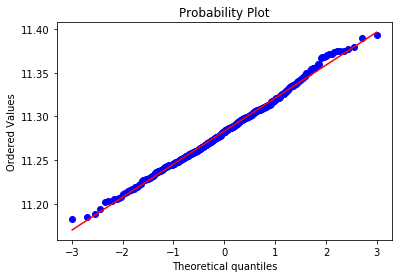

R= 0.99797483646


In [115]:
p1,p2=stats.probplot(control_clics_mean_scores, dist="norm", plot=plt)
plt.show()
print ("R=",p2[2])

4 Для получившегося вектора сумм квадратов отклонения от выборочного среднего постройте qq-plot с помощью scipy.stats.probplot для хи-квадрат распределения с помощью команды



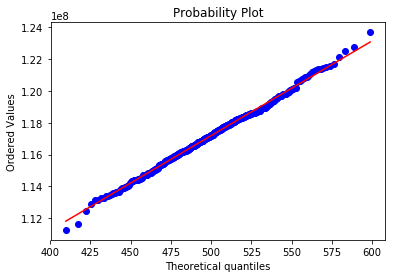

R= 0.998641669882


In [116]:
n=len(control_boot_chi_squared)
p1,p2=stats.probplot(control_boot_chi_squared, dist="chi2", sparams=(n-1), plot=plt)
plt.show()
print ("R=",p2[2])

** Ответ**
* R2 для выборочного среднего получился больше, чем 0.99
* R2 для выборочной суммы квадратов отклонения от выборочной суммы получился больше, чем 0.99

# Task 5 
Разделите выборку на две части, соответствующие control и exp группам. Преобразуйте данные к виду, чтобы каждому пользователю соответствовало суммарное значение его кликов. С помощью критерия Манна-Уитни проверьте гипотезу о равенстве средних. Что можно сказать о получившемся значении достигаемого уровня значимости ? Выберите все правильные ответы

In [166]:
exp_clics=data[data['slot']=='exp'][['userID','n_clicks']]
exp_clics=exp_clics.groupby(by='userID').sum().as_matrix()
control_clics=data[data['slot']=='control'][['userID','n_clicks']]
control_clics=control_clics.groupby(by='userID').sum().as_matrix()

In [167]:
stats.mannwhitneyu(exp_clics, control_clics)

MannwhitneyuResult(statistic=38901259929.0, pvalue=4.3471471887604393e-75)

**Ответ**
Получившееся значение достигаемого уровня значимости свидетельствует о статистической значимости отличий между двумя выборками

# Task 6
Проверьте, для какого из браузеров наиболее сильно выражено отличие между количеством кликов в контрольной и экспериментальной группах.

Для этого примените для каждого из срезов (по каждому из уникальных значений столбца browser) критерий Манна-Уитни между control и exp группами и сделайте поправку Холма-Бонферрони на множественную проверку с α=0.05.

Какое заключение можно сделать исходя из полученных результатов ?

В качестве ответа введите количество незначимых изменений с точки зрения результатов, полученных после введения коррекции.

In [208]:
p=list()
for browser in data.browser.value_counts().index:
    exp_clics=data[(data['slot']=='exp')&(data.browser==browser)]['n_clicks'].as_matrix()
    control_clics=data[(data['slot']=='control')&(data.browser==browser)]['n_clicks'].as_matrix()
    print ("%s exp_clics %d control_clics %d"%(browser, len(exp_clics),len(control_clics)))
    s=stats.mannwhitneyu(exp_clics, control_clics)
    print ("  p-value=",s[1])
    p.append(s[1])
reject,p_corrected,a1,a2=multipletests(p,alpha=0.05,method='holm')
# Выводим ответ
print ((reject==False).sum())

Browser #4 exp_clics 78152 control_clics 78681
  p-value= 0.407606176585
Browser #22 exp_clics 71080 control_clics 71825
  p-value= 0.257405515221
Browser #2 exp_clics 54944 control_clics 55793
  p-value= 0.0272438604197
Browser #14 exp_clics 44220 control_clics 44903
  p-value= 0.0
Browser #20 exp_clics 16931 control_clics 16998
  p-value= 0.453666563887
Browser #17 exp_clics 16253 control_clics 16354
  p-value= 0.0374006014301
5


**Ответ**

5

# Task 7
Для каждого браузера в каждой из двух групп (control и exp) посчитайте долю запросов, в которых пользователь не кликнул ни разу. Это можно сделать, поделив сумму значений n_nonclk_queries на сумму значений n_queries. Умножив это значение на 100, получим процент некликнутых запросов, который можно легче проинтерпретировать.

Сходятся ли результаты проведенного Вами анализа с показателем процента некликнутых запросов ? Отметьте все верные утверждения.

In [222]:
def get_nonclk_rate(data):
    return data.n_nonclk_queries.sum()/data.n_queries.sum()*100

res=pd.DataFrame(columns=['exp','control'])
for browser in data.browser.value_counts().index:
    exp_data=data[(data['slot']=='exp')&(data.browser==browser)]
    control_clics=data[(data['slot']=='control')&(data.browser==browser)]
    res.loc[browser,'exp']=get_nonclk_rate(exp_data)
    res.loc[browser,'control']=get_nonclk_rate(control_clics)
res

,exp,control
Browser #4,45.1429,46.9709
Browser #22,39.8539,40.594
Browser #2,44.9827,45.9627
Browser #14,43.7556,57.5904
Browser #20,38.9774,40.5405
Browser #17,36.9374,36.2994


** Ответ **
* С помощью анализа, проведенного в предыдущем вопросе, мы показали, что тестируемое изменение приводит к статистически значимому отличию только для одного браузера. Для этого браузера на основе данных о доли некликнутых запросов, заключаем, что тестируемое изменение влияет на пользователей позитивно.